In [ ]:
import numpy as np
import pandas as pd
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [13]:
X_train[1].shape

(28, 28)

In [15]:
plt.matshow(X_train[0])

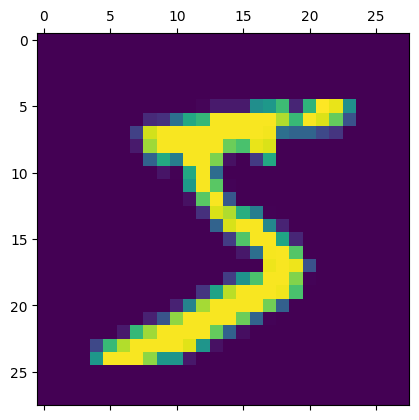

In [17]:
plt.show()

In [19]:
Y_train[0]

5

In [21]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flattend.shape

(60000, 784)

In [27]:
import os
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),          #input layer
    keras.layers.Dense(100,activation='relu'),          #hidden layer with 100 neoron
    keras.layers.Dense(10,activation='sigmoid'),        #o/p layer
])

tensorboard_callback = TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
)
model.fit(X_train,Y_train,epochs=10,callbacks=[tensorboard_callback])

C:\Users\sivam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7278 - loss: 1.0328
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.3556
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.2996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9234 - loss: 0.2690
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9311 - loss: 0.2473
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9352 - loss: 0.2275
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9401 - loss: 0.2100
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9456 - loss: 0.1943
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9480 - loss: 0.1858
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9518 - loss: 0.1691


In [30]:
X_test_reshaped = X_test_flattend[0].reshape(1, 28, 28)  # Reshape to (1, 28, 28)

# Now predict
Y_predict = model.predict(X_test_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [31]:
Y_predict[0]

array([6.2805051e-01, 1.2516631e-03, 9.8296285e-01, 9.9222088e-01,
       2.5787616e-02, 7.3757368e-01, 2.7115253e-04, 9.9996853e-01,
       5.7797569e-01, 7.9173195e-01], dtype=float32)

In [32]:
np.argmax(Y_predict[0])

7

In [33]:
Y_predict[0]

array([6.2805051e-01, 1.2516631e-03, 9.8296285e-01, 9.9222088e-01,
       2.5787616e-02, 7.3757368e-01, 2.7115253e-04, 9.9996853e-01,
       5.7797569e-01, 7.9173195e-01], dtype=float32)

In [51]:
Y_test[0]

7

In [53]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10700), started 1 day, 18:33:56 ago. (Use '!kill 10700' to kill it.)